# Data Science Project: Predicting Usage of a Video Game Research Server

**_______________________________________________________________________________________________________________________________**

## Predicting Whether a Player's Age Determines Their Subscription to Game-Related Newsletters

### Introduction

At UBC, a research group led by Frank Wood collected data on people playing video games, specifically Minecraft. Minecraft is a popular game played by millions of people worldwide. Many players often become hooked on Minecraft and stay hooked through newsletters. Newsletters are emails that are sent to players to share news about updates and special offers, encouraging them to buy items and continue playing. However, subscribing to these newsletters is optional. 

The question we want to answer is: **Can a player's age predict whether they will subscribe to Minecraft emails and newsletters in the `players.csv` dataset?**

The data  collected includes: 
- Players' experience (`experience`)
- Whether they subscribed to receive game-related newsletters (`subscribe`)
- Players' email (`hashedEmail`)
- The number of hours players play Minecraft (`played_hours`)
- The players' name (`name`)
- The players' gender (`gender`)
- The players' age (`Age`)

Note that some variables contain missing information for certain players (e.g., N/A). These missing values must be addressed and removed when cleaning the data. 

### Methods & Results

Load the Libraries 

In [1]:
#Run cell to load
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Load the players dataset

In [2]:
players_data <- read_csv("Data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


_Table 1.1: Loaded players dataset_

Clean up the dataset to include the needed columns, `subscribe` and `Age`. Convert the `subscribe` column into a categorical factor variable so that it can be used in classification and drop all rows with missing values (e.g., NA). 

In [3]:
players_data_clean <- players_data |>
    select(subscribe, Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    drop_na()
players_data_clean

subscribe,Age
<fct>,<dbl>
TRUE,9
TRUE,17
FALSE,17
⋮,⋮
FALSE,22
FALSE,17
FALSE,17


_Table 1.2: Cleaned-up dataset with selected columns_

Summarize the dataset by group together the subscribe column into its two groups, `FALSE` and `TRUE`, and calculate the average (`mean`) and `median` of players that subscribe to newsletters and players that don't to observe whether there is a relationship between age and newsletter subscription. 

From the summarized dataset, we can see that the average age of players that don't subscribe to newsletters is 22.98 and their median age is 21, while the players that do subscribe, their average age is 19.61, and median age is 18. 

In [4]:
players_data_summary <- players_data_clean |>
    group_by(subscribe) |>
    summarize(mean_age = mean(Age), med_age = median(Age))
players_data_summary

subscribe,mean_age,med_age
<fct>,<dbl>,<dbl>
FALSE,22.98077,21
TRUE,19.61972,18


_Table 1.3: Summarized dataset_

To properly observe the relationship between age and subscription, we created a bar plot to visualize the number of players that subscribed and didn't. 
We can see from the the bar plot that 17 year-olds play Minecraft the most so they are the ones that subscribed to Minecraft newsletters the most, but also the age group that are most likely not to subscribe. 
From the data given to us, let's see if we can create a model that can answer out question about whether a player's age can predict whether they will subscribe to Minecraft emails and newsletter. 

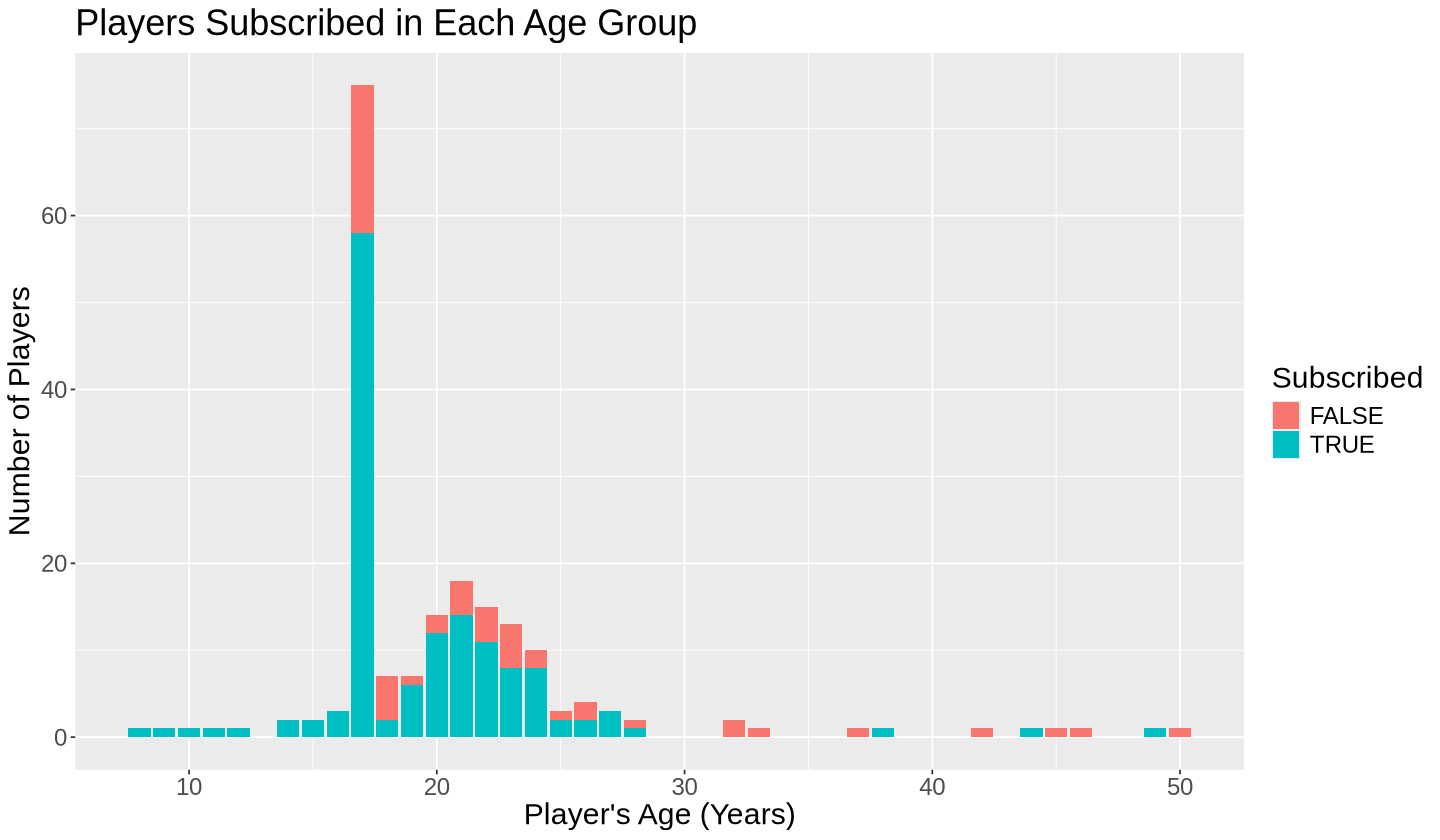

In [8]:
options(repr.plot.width = 12, repr.plot.height = 7)
player_data_clean_plot <- players_data_clean |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_bar(stat = "count") +
    labs(x = "Player's Age (Years)", y = "Number of Players", fill = "Subscribed") +
    ggtitle("Players Subscribed in Each Age Group") +
    theme(text = element_text(size = 18))
player_data_clean_plot

_Figure 1.1: Bar plot of the number of players in various age groups that subscribed to newsletters (`TRUE`) and didn't (`FALSE`)._

Set the seed, so that we can get reproducible results. 
Then split the players data set into a training and testing set.

In [9]:
set.seed(1000)

players_split <- initial_split(players_data_clean, prop = 0.75, strata = subscribe) 
players_train <- training(players_split) 
players_test <- testing(players_split)

Determine the response and predictor varibales, then scale and center the predictor variables to ensure the model is efficient.

In [10]:
players_recipe <- recipe(subscribe ~ Age, data = players_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 1



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



To find the best K value for our model, we will first test different values to determine which value gives us the highest accurage. 
We start by first setting the engine to kknn and model to classification since we want to create a K-nn classification model. 

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We want to perform a 5-fold cross-validation on the training set, so we set `v` = 5, and the strata variable as our categorical variable. 

In [12]:
training_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

Using tibble, we create a data frame, to determine the accuracy values of k values of 1 to 10, so we set `from` to 1, `to` to 10 and stepping by a value of 1 each time. 

In [13]:
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

To obtain the table, we put it all together, adding our recipe, model and collecting metrics for the data table. 

In [14]:
train_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = training_vfold, grid = k_vals) |>
    collect_metrics()
train_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model01
1,roc_auc,binary,0.4674242,5,0.03501448,Preprocessor1_Model01
2,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.3936959,5,0.06014271,Preprocessor1_Model09
10,accuracy,binary,0.4063875,5,0.04657670,Preprocessor1_Model10
10,roc_auc,binary,0.3831749,5,0.06059667,Preprocessor1_Model10


_Table 1.4: Results of the K-values from 1 to 10._

For our analysis of choosing the best K value, from the .metric column, we want to filter for the accuracy values.

In [16]:
accuracies <- train_workflow |> 
       filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model01
2,accuracy,binary,0.3169130,5,0.02645666,Preprocessor1_Model02
3,accuracy,binary,0.3982594,5,0.05708483,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
8,accuracy,binary,0.3568801,5,0.05982796,Preprocessor1_Model08
9,accuracy,binary,0.4128243,5,0.05307571,Preprocessor1_Model09
10,accuracy,binary,0.4063875,5,0.04657670,Preprocessor1_Model10


_Table 1.5: Accuracy values for the 1-10 K-values._

Now we plot the Accuracy Estimate vs. Neighbours to visually observe and see which k value gives us the highest accuracy estimate, which from the plot, we can see is k = 9. 

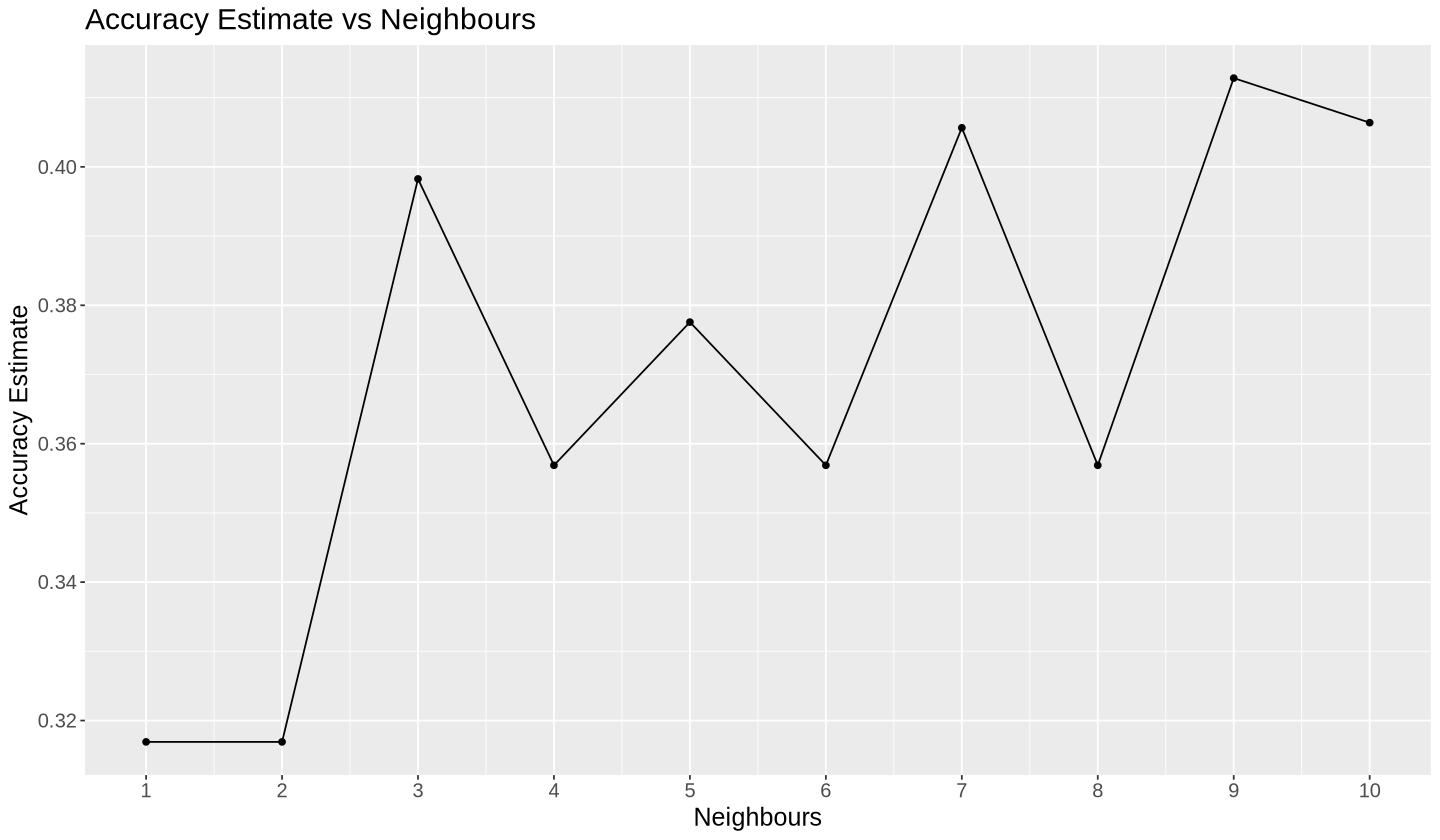

In [19]:
accuracy_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbours", y = "Accuracy Estimate", title = "Accuracy Estimate vs Neighbours") +
    scale_x_continuous(breaks = seq(1, 10, by = 1)) +
    theme(text = element_text(size = 15))
accuracy_plot

_Figure 1.2: Plot of Accuracy Estimate vs Neighbours_

We will not use our K value of 9 which gave us the highest accuracy to train our model and then test it using the testing set. 

In [20]:
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 9) |>
    set_engine("kknn") |>
    set_mode("classification")

We repeat our step of creating a workflow with the players recipe, but this time we use our model that we inputted 9 for the neighbours, and put our training data set into the fit function. 

In [21]:
best_knn_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(best_knn_spec) |>
    fit(data = players_train)
best_knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(9,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.5172414
Best kernel: rectangular
Best k: 9

We can not use the predict function to use our model on the testing set to see its accuracy. 

In [22]:
knn_predictions <- predict(best_knn_fit, players_test) |>
    bind_cols(players_test)

We can now see how accurate our k-NN model is at predicting newsletter subscriptions for different ages by filtering for the accuracy 

In [23]:
knn_metrics <- knn_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)|>
    filter(.metric == "accuracy")
knn_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5510204


_Table 1.6: The accuracy value on the testing set when k = 9 is used._

We create the confusion matrix now to see what our model predicted. 
From the confusion matrix, we can see that out of 49 predictions, the model got 27 correct, 5 for `FALSE` and 22 for `TRUE`.
So, it has an accuracy of 55.10%.

In [51]:
knn_conf_mat <- knn_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
knn_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     5   14
     TRUE      8   22

_Table 1.7: The confusion matrix for our table._

### Discussion

From out results, we can conclude that due to it having a low accuracy estimate of 55.10%, our model is not very good at predicting who will subscribe to newsletters and who won't. 
There we can not predict from a player's age whether they will subscribe to Minecraft emails and newsletter in the players.csv dataset. 

I did not expect to get this conclusion. I thought that we would atleast have a accuracy estimate of atleast 75% since I belived that age might play an important role in whether subscriptions to emails occur. 

Getting an accuracy estimate of 55.10%, suggests that a player's age doesn't determine whether they will subscribe to newsletters, so this information especially for game developers is valuable as they must target another factor, not just age to determine how to get the most attention and exposure from old and new players. 

Future questins that this could lead us to is if age doesn't predict whether a player will subscribe to Minecraft emails and newsletters, which charcateristic will predict whether players will subscribe to emails?